# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy.stats import pearsonr
#plt.style.use('seaborn')
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
import matplotlib.dates as mdates1
import matplotlib.ticker as mtick
from decimal import Decimal
from scipy.stats import norm
import matplotlib

In [ ]:
import re
from datetime import date, timedelta
from datetime import datetime
import math
import calendar

from datetime import datetime
import copy
import locale
import os
import requests
import time

from matplotlib.ticker import FuncFormatter

# Visualization Functions


In [ ]:
config={'app_name': 'Hacktiv8', 'dest_folder':'/content/drive/MyDrive/Colab Notebooks/Colab Images/Heart Stroke/'}

try:
    os.mkdir(config['dest_folder'])
except OSError as error:
    None

In [ ]:
def line_plot(data_frame, x, y, x_label, y_label, plot_title, save=False, v_line=None, v_line_label=None, y_lim=None, y_lower=None):
    sea_plot = sns.lineplot(data=data_frame, x=x, y=y, color='#3498db')
    ax = plt.gca()
    plt.xlabel(x_label, fontsize=12, fontweight='black', color = '#333F4B')
    plt.ylabel(y_label, fontsize=12, fontweight='black', color = '#333F4B')
    if y_lim is not None:
        plt.ylim(y_lower or 0, y_lim)
    else:
        plt.ylim(y_lower or 0, np.percentile(data_frame[data_frame[y].notna()][y], 99))
    if v_line is not None and v_line_label is not None:
        ax.axhline(y=v_line, color='#c0392b', label=v_line_label)
        sea_plot.legend(loc='lower center', bbox_to_anchor=(0.5, -0.125), ncol=3)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval = 14))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:n}'.format(x)))
    plt.title(plot_title, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 12})
    plt.grid(True)
    if save:
        plt.savefig(config['dest_folder']+'/%s.png' % plot_title.replace('/','_'), dpi=300, bbox_inches='tight')
    plt.show()

# Plot Line
def plot_line(x, y, x_label, y_label, plot_title, save = False):
    plt.figure(figsize=(12,9))
    plt.plot(x,y, marker = 'o')
    ax = plt.gca()
    plt.xlabel(x_label, fontsize=16, fontweight='black', color = '#333F4B')
    plt.ylabel(y_label, fontsize=16, fontweight='black', color = '#333F4B')
    for i,j in zip(x,y):
        ax.annotate(str(j),xy=(i,j))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(plot_title, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 20})
    plt.grid(True)
    if save:
        plt.savefig(config['dest_folder']+'/%s.png' % plot_title.replace('/','_'), dpi=300, bbox_inches='tight')
    plt.show()

def textinsideplot(x_pos, y_pos, teks, font_size=12):
    plt.gcf().text(x_pos, y_pos, teks, fontdict={'size': font_size, 'verticalalignment': 'top', 'horizontalalignment': 'right'})

def plot_hist(data_frame, feature, label, plot_title, kde, save=False):
    #n_bin = int(np.percentile(data_frame[data_frame[feature].notna()][feature], 95)/50)
    #if n_bin < 30:
    #    n_bin = 30
    #elif n_bin >= 70:
    #    n_bin = 70
    #print(n_bin, 'bin')
    plt.figure(figsize=(12, 6))
    sea_plot = sns.distplot(data_frame[data_frame[feature].notna()][feature], kde=kde, color='#3498db')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:.2f}'.format(x)))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:.8f}'.format(x)))
    sea_plot.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)
    #plt.xlabel(fontsize=16)
    #plt.ylabel(fontsize=16)
    #plt.xticks(fontsize=14)
    #plt.xticks(fontsize=14)
    plt.title(plot_title, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 18})
    plt.grid(True)
    #ax.ticklabel_format(useOffset=False)
    #plt.xticks(format(np.arange(data_frame[feature].min(), data_frame[feature].max(), data_frame[feature].max()/5)),  'f')
    if save:
        plt.savefig(config['dest_folder']+'/%s.png' % plot_title.replace('/','_'), dpi=300, bbox_inches='tight')
    plt.show()

def pie_label(pct, allvalues, types='transactions'):
    absolute = int(pct / 100.*np.sum(allvalues))
    return '{:.2f}%\n({:n} {})'.format(pct, absolute, types)

def draw_pie(data, label, color, title, save=False, types='transactions'):
    fig, ax = plt.subplots(figsize =(10, 10))
    wedges, texts, autotexts = plt.pie(data, labels=label, colors=color, autopct = lambda pct: pie_label(pct, data, types), textprops = dict(color='w'))
    ax.legend(wedges, label,loc ="lower right")
    plt.setp(autotexts, size = 12)
    plt.title(title, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 12})
    if save:
        plt.savefig(config['dest_folder']+'/%s.png' % title, dpi=300, bbox_inches='tight')
    plt.show()

def plot_multiline(data_frame, x, y, hue, x_label, y_label, plot_title, save=False, v_line=None, v_line_label=None, y_lim=None, is_xdate=True):
    sea_plot = sns.lineplot(data=data_frame, x=x, y=y, hue=hue)
    ax = plt.gca()
    plt.xlabel(x_label, fontsize=12, fontweight='black', color = '#333F4B')
    plt.ylabel(y_label, fontsize=12, fontweight='black', color = '#333F4B')
    if y_lim is not None:
        plt.ylim(0, y_lim)
    else:
        plt.ylim(0, np.percentile(data_frame[data_frame[y].notna()][y], 99))
    if v_line is not None and v_line_label is not None:
        ax.axhline(y=v_line, color='#c0392b', label=v_line_label)
        sea_plot.legend(loc='lower center', bbox_to_anchor=(0.5, -0.125), ncol=3)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:n}'.format(x)))
    if is_xdate:
        ax.xaxis.set_major_locator(mdates.DayLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
    else:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.title(plot_title, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 12})
    plt.grid(True)
    if save:
        plt.savefig(config['dest_folder']+'/%s.png' % plot_title, dpi=300, bbox_inches='tight')
    plt.show()

def plot_hbar(data_frame, x, y, x_label, y_label, plot_title, save=False, rotate_x=False, v_line=None, v_line_label=None):
    plt.figure(figsize=(20,14))

    # Sort the DataFrame by the x-column in ascending order
    data_frame = data_frame.sort_values(by=x, ascending=False)

    sea_plot = sns.barplot(data=data_frame, x=x, y=y, ci=None, palette="RdYlGn_r")
    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:n}'.format(x)))
    plt.xlabel(x_label, fontsize=18, fontweight='black', color = '#333F4B')
    plt.ylabel(y_label, fontsize=18, fontweight='black', color = '#333F4B')

    # Set the y-tick labels directly
    plt.yticks(range(len(data_frame[y])), data_frame[y], fontsize=15)
    plt.xticks( fontsize=15)

    if rotate_x:
        plt.xticks(rotation=60)
    if v_line is not None and v_line_label is not None:
        ax.axhline(y=v_line, color='#c0392b', label=v_line_label)
        sea_plot.legend(loc='lower center', bbox_to_anchor=(0.5, -0.125), ncol=3)
    plt.title(plot_title, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 22})
    plt.grid(True)
    if save:
        plt.savefig(config['dest_folder']+'/%s.png' % plot_title, dpi=300, bbox_inches='tight')
    plt.show()


def plot_heat(data_frame, labels, plot_title, save=False):
    plt.figure(figsize=(15,10))
    sns.heatmap(data_frame.corr(),cmap='RdBu_r', annot=True ,annot_kws={'size':10}, xticklabels=labels, yticklabels=labels)
    ax = plt.gca()
    plt.title(plot_title, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 12})
    if save:
        plt.savefig(config['dest_folder']+'/%s.png' % plot_title.replace('/','_'), dpi=300, bbox_inches='tight')
    plt.show()

def plot_boxplot(data_frame, x, y, x_label, y_label, plot_title, displayoutlier=False, save=False, v_line=None, v_line_label=None, y_lim=None):
    plt.figure(figsize=(17,8))
    sns.color_palette('CMRmap')
    sea_plot = sns.boxplot(data=data_frame, x=x, y=y, showfliers=displayoutlier)
    ax = plt.gca()
    plt.xlabel(x_label, fontsize=14, fontweight='black', color = '#333F4B')
    plt.ylabel(y_label, fontsize=14, fontweight='black', color = '#333F4B')
    if y_lim is not None:
        plt.ylim(0, y_lim)
    else:
        plt.ylim(data_frame[y_label].min(), np.percentile(data_frame[data_frame[y].notna()][y], 99))
    if v_line is not None and v_line_label is not None:
        ax.axhline(y=v_line, color='#c0392b', label=v_line_label)
        sea_plot.legend(loc='lower center', bbox_to_anchor=(0.5, -0.125), ncol=3)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:.2f}'.format(x)))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(plot_title, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 20})
    plt.grid(True)
    if save:
        plt.savefig(config['dest_folder']+'/%s.png' % plot_title, dpi=300, bbox_inches='tight')
    plt.show()

#function for countplot seaborn
def plot_count(data_frame,x,x_label,label_y,title_plot,hue=None, save=False, rotate_x=False):
    plt.figure(figsize=(17,8))
    order = data_frame[x].value_counts().index
    count_plot = sns.countplot(data=data_frame,x=x,order=order,hue=hue)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:n}'.format(x)))
    plt.xlabel(x_label, fontsize=12, fontweight='black', color = '#333F4B')
    plt.ylabel(label_y, fontsize=12, fontweight='black', color = '#333F4B')
    if hue is not None:
        hue = hue
    if rotate_x:
        plt.xticks(rotation=90)
    #Plus a label number count in each bar
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    plt.title(title_plot, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 12})
    plt.grid(True)
    if save:
        plt.savefig(config['dest_folder']+'/%s.png' % title_plot, dpi=300, bbox_inches='tight')
    plt.show()

def plot_count_after(data_frame,y,y_label,x_label,title_plot,hue=None, save=False, rotate_y=False):
    plt.figure(figsize=(20,10))
    order = data_frame[y].value_counts().index
    reversed_palette = list(reversed(sns.color_palette("RdYlGn")))
    count_plot = sns.countplot(data=data_frame,y=y,order=order,hue=hue, palette="RdYlGn_r")
    ax = plt.gca()
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:n}'.format(x)))
    plt.xlabel(x_label, fontsize=18, fontweight='black', color = '#333F4B')
    plt.ylabel(y_label, fontsize=18, fontweight='black', color = '#333F4B')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    if hue is not None:
        hue = hue
    if rotate_y:
        plt.yticks(rotation=90)
    #Plus a label number count in each bar
    #for p in ax.patches:
        #ax.annotate('{:.1f}'.format(p.get_width()), (p.get_y()+0.1, p.get_width()+10))
    plt.title(title_plot, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 22})
    plt.grid(True)
    if save:
        plt.savefig(config['dest_folder']+'/%s.png' % title_plot, dpi=300, bbox_inches='tight')
    plt.show()

#locale.setlocale(locale.LC_ALL, 'id_ID.UTF-8')
#rt_label = ['< {:n} ms'.format(config['response_time_sla']), '>= {:n} ms'.format(config['response_time_sla'])]
#success_label = ['Success', 'Failed']
color = ['#3498db', '#c0392b']

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

def convert_to_percent(x, pos):
    return f'{x*100:.0f}%'

# Statistical Functions

In [ ]:
def persentil(df, features):
    feat_stats=pd.DataFrame()
    Min=np.zeros(len(features))
    P1=np.zeros(len(features))
    P5=np.zeros(len(features))
    P10=np.zeros(len(features))
    P20=np.zeros(len(features))
    P25=np.zeros(len(features))
    P40=np.zeros(len(features))
    P50=np.zeros(len(features))
    P60=np.zeros(len(features))
    P75=np.zeros(len(features))
    P80=np.zeros(len(features))
    P95=np.zeros(len(features))
    P99=np.zeros(len(features))
    Max=np.zeros(len(features))
    Mean=np.zeros(len(features))


    for i in range (len(features)):
        Min[i]=df[features[i]].min()
        P1[i]=df[features[i]].quantile(0.01)
        P5[i]=df[features[i]].quantile(0.05)
        P10[i]=df[features[i]].quantile(0.1)
        P20[i]=df[features[i]].quantile(0.20)
        P25[i]=df[features[i]].quantile(0.25)
        P40[i]=df[features[i]].quantile(0.40)
        P50[i]=df[features[i]].quantile(0.5)
        P60[i]=df[features[i]].quantile(0.6)
        P75[i]=df[features[i]].quantile(0.75)
        P80[i]=df[features[i]].quantile(0.80)
        P95[i]=df[features[i]].quantile(0.95)
        P99[i]=df[features[i]].quantile(0.99)
        Max[i]=df[features[i]].max()
        Mean[i]=df[features[i]].mean()
    pd.options.display.float_format = '{:.2f}'.format
    feat_stats=pd.DataFrame({'features':features, 'Min':Min, 'P1':P1, 'P5':P5,'P10':P10,'P20':P20, 'P25':P25,'P40':P40, 'P50':P50,
                             'P60':P60,'P75':P75,'P80':P80,'P95':P95, 'P99':P99, 'Max':Max, 'Mean':Mean
                        })
    feat_stats
    return feat_stats

In [ ]:
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = x.size-1
    dun = y.size-1
    p_value = 1-scipy.stats.f.cdf(f, nun, dun)
    return f, p_value

In [ ]:
def null_ratio(data, features):
    nullratio_feature=pd.DataFrame()
    null=np.zeros(len(features))
    null_ratio=np.zeros(len(features))

    for i in range (len(features)):
        null[i]=data[features[i]].isna().sum()
        null_ratio[i]=((data[features[i]].isna().sum())/len(data))*100

    nullratio_feature=pd.DataFrame({'features':features,'null count':null, 'null ratio (%)':null_ratio})
    nullratio_feature
    return nullratio_feature

In [ ]:
def display_correlation(df, features, name):
    r = df.corr(method="spearman")
    plt.figure(figsize=(15,12))
    pd.options.display.float_format = '{:.2f}'.format
    heatmap = sns.heatmap(df[features].corr(method="spearman"), vmin=-1,
                      vmax=1, annot=True, annot_kws={
                'fontsize': 16})
    plt.title("Spearman Correlation", fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    #plt.savefig('./Images/korelasi_spearman_'+name+'.png',bbox_inches='tight',dpi=200)
    return(r)

In [ ]:
def display_correlation_pearson(data, features, name):
    r = data.corr(method="pearson")
    plt.figure(figsize=(15,12))
    pd.options.display.float_format = '{:.2f}'.format
    heatmap = sns.heatmap(data[features].corr(), vmin=-1,
                      vmax=1, annot=True, annot_kws={
                'fontsize': 16})
    plt.title("Pearson Correlation", fontsize=19)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    #plt.savefig('./Images/korelasi_pearson_'+name+'.png',bbox_inches='tight',dpi=200)
    return(r)

In [ ]:
def scoring_percentile(series):
    p01=series.quantile(0.01)
    p05=series.quantile(0.05)
    p25=series.quantile(0.25)
    p50=series.quantile(0.50)
    p75=series.quantile(0.75)
    p95=series.quantile(0.95)
    return p01, p05, p25, p50, p75, p95

def scoring(x, p01, p05, p25, p50, p75, p95):
    if  x <= p01:
        return 0
    elif x > p01 and x <= p05:
        return 5
    elif x > p05 and x <= p25:
        return 25
    elif x > p25 and x <= p50:
        return 50
    elif x > p50 and x <= p75:
        return 75
    elif x > p75 and x <= p95:
        return 95
    elif x >p95:
        return 100
    else:
        return np.nan


In [ ]:
def calculate_cagr(initial_value, final_value, periods):
    cagr = (final_value / initial_value) ** (1 / periods) - 1
    return cagr

In [ ]:
print('harga tahun kelima: ', 1000)
print('harga tahun pertama: ', 500)

harga tahun kelima:  1000
harga tahun pertama:  500


In [ ]:
((1000-500)/500)*100

100.0

In [ ]:
calculate_cagr(500, 1000, 5)*100

14.869835499703509

# Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/kampus merdeka/hacktiv8/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
null_ratio(df, df.columns)

,features,null count,null ratio (%)
0,id,0.0,0.000000
1,gender,0.0,0.000000
2,age,0.0,0.000000
3,hypertension,0.0,0.000000
4,heart_disease,0.0,0.000000
5,ever_married,0.0,0.000000
6,work_type,0.0,0.000000
7,Residence_type,0.0,0.000000
8,avg_glucose_level,0.0,0.000000
9,bmi,201.0,3.933464


In [ ]:
null_ratio(df, ['bmi', 'stroke'])

,features,null count,null ratio (%)
0,bmi,201.0,3.933464
1,stroke,0.0,0.000000


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df['id']=df['id'].astype('str')

# Simple EDA

Rentang BMI:
- Kurang dari 18,5 berarti berat badan kurang (underweight).
- Antara 18,5 - 24,9 berarti berat badan normal
- Antara 25-29,9 berarti berat badan berlebih (overweight).
- Di atas 30 berarti obesitas

Artikel ini dibuat dan diterbitkan oleh Siloam Hospitals, baca selengkapnya di: *https://www.siloamhospitals.com/informasi-siloam/artikel/cara-menghitung-bmi*


In [ ]:
28.89*1.7*1.7

83.4921

In [ ]:
df['bmi']=df['bmi'].fillna(df['bmi'].median())

In [ ]:
df[df['bmi']<11]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1609,38043,Female,1.24,0,0,No,children,Rural,122.04,10.3,Unknown,0


Glucose Level:
- If you had a fasting blood glucose test, a level of 70 to 99 mg/dL (3.9 and 5.5 mmol/L) is considered normal. If you had a random blood glucose test, a normal result depends on when you last ate. Most of the time, the blood glucose level will be 125 mg/dL (6.9 mmol/L) or lower.


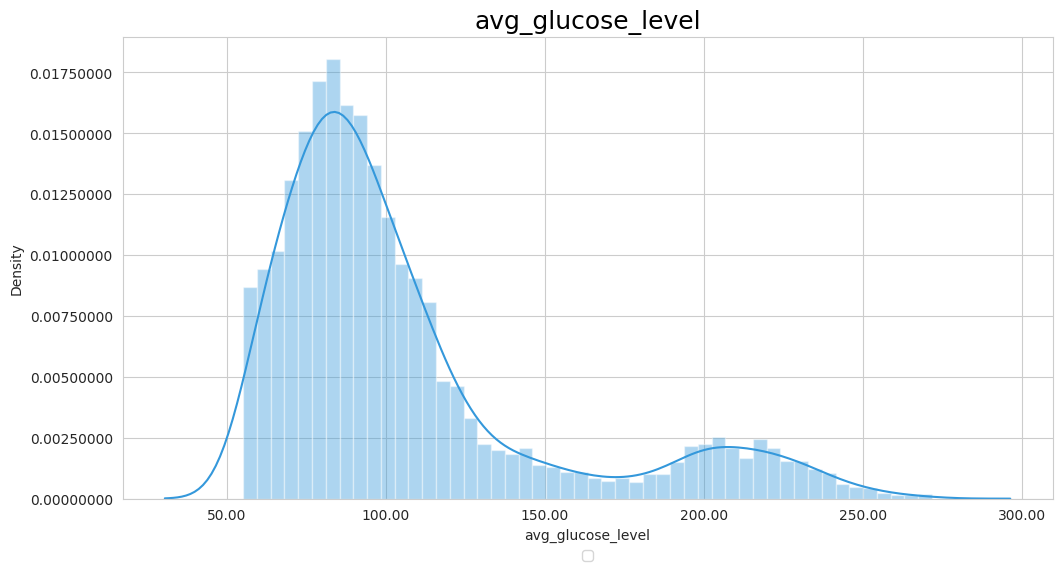

In [ ]:
plot_hist(df, 'avg_glucose_level', 'avg_glucose_level', 'avg_glucose_level', True, save=False)

In [ ]:
persentil(df[df['stroke']==1], ['avg_glucose_level'])

,features,Min,P1,P5,P10,P20,P25,P40,P50,P60,P75,P80,P95,P99,Max,Mean
0,avg_glucose_level,56.11,58.01,62.16,68.51,76.12,79.79,93.93,105.22,126.66,196.71,205.52,236.90,256.31,271.74,132.54


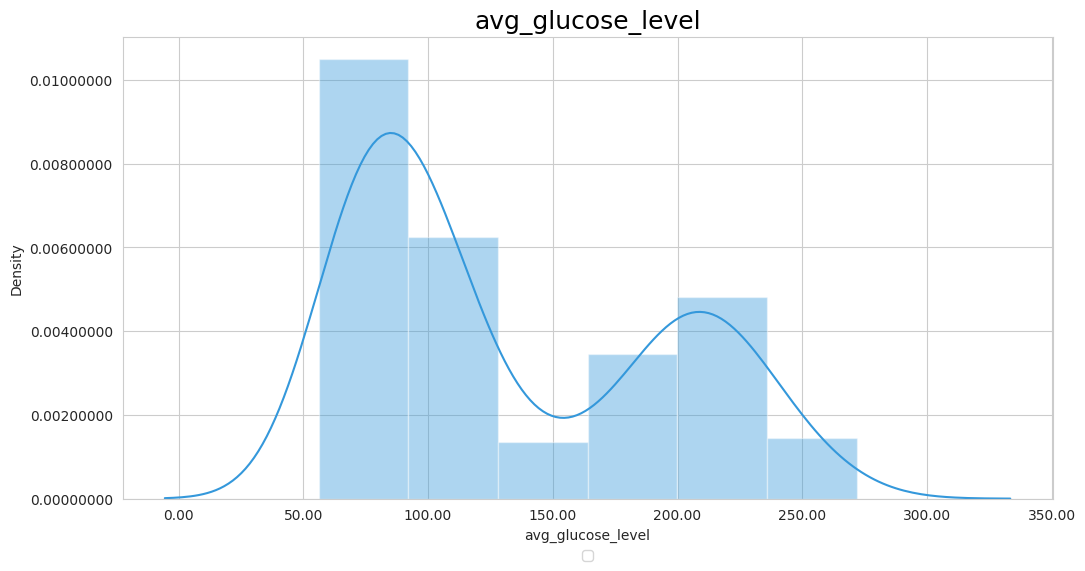

In [ ]:
plot_hist(df[df['stroke']==1], 'avg_glucose_level', 'avg_glucose_level', 'avg_glucose_level', True, save=False)

In [ ]:
persentil(df[df['stroke']==0], ['avg_glucose_level'])

,features,Min,P1,P5,P10,P20,P25,P40,P50,P60,P75,P80,P95,P99,Max,Mean
0,avg_glucose_level,55.12,56.33,60.67,65.69,73.71,77.12,85.27,91.47,98.22,112.83,122.19,213.54,239.24,267.76,104.80


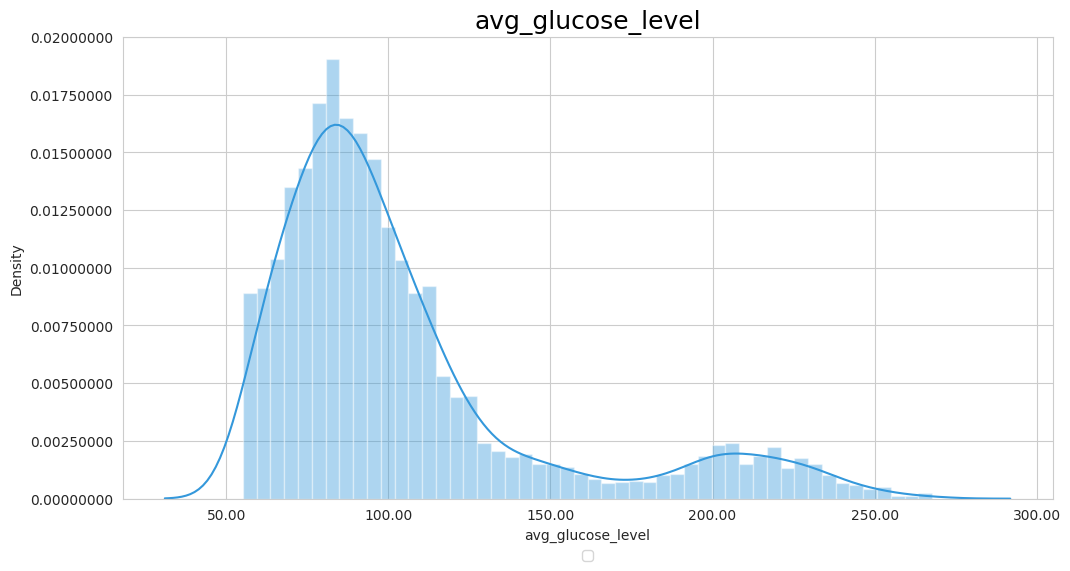

In [ ]:
plot_hist(df[df['stroke']==0], 'avg_glucose_level', 'avg_glucose_level', 'avg_glucose_level', True, save=False)

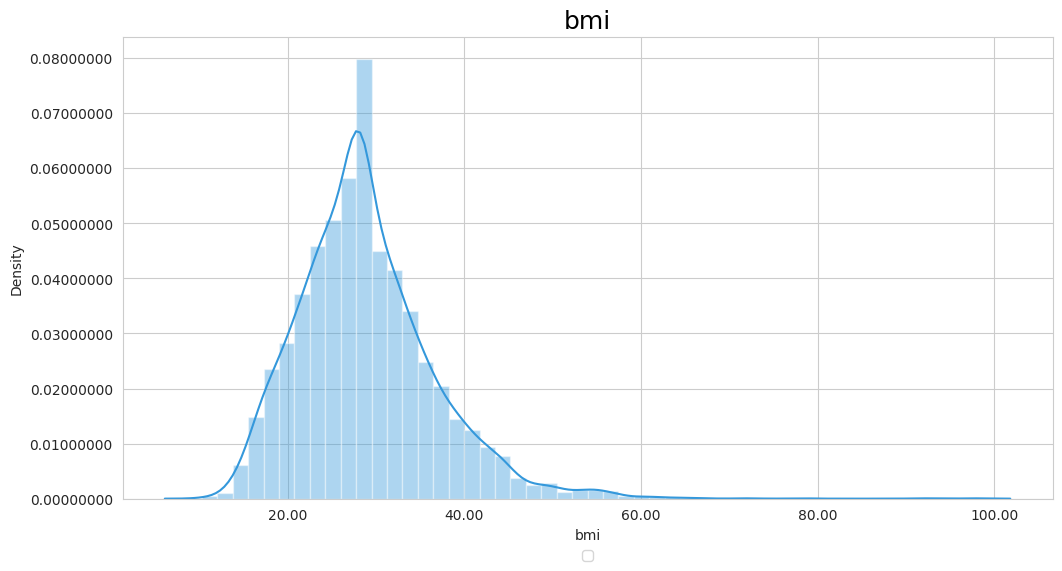

In [ ]:
plot_hist(df, 'bmi', 'bmi', 'bmi', True, save=False)

In [ ]:
persentil(df, ['bmi'])

,features,Min,P1,P5,P10,P20,P25,P40,P50,P60,P75,P80,P95,P99,Max,Mean
0,bmi,10.30,15.11,17.70,19.89,22.70,23.80,26.70,28.10,29.50,32.80,34.30,42.66,52.89,97.60,28.86


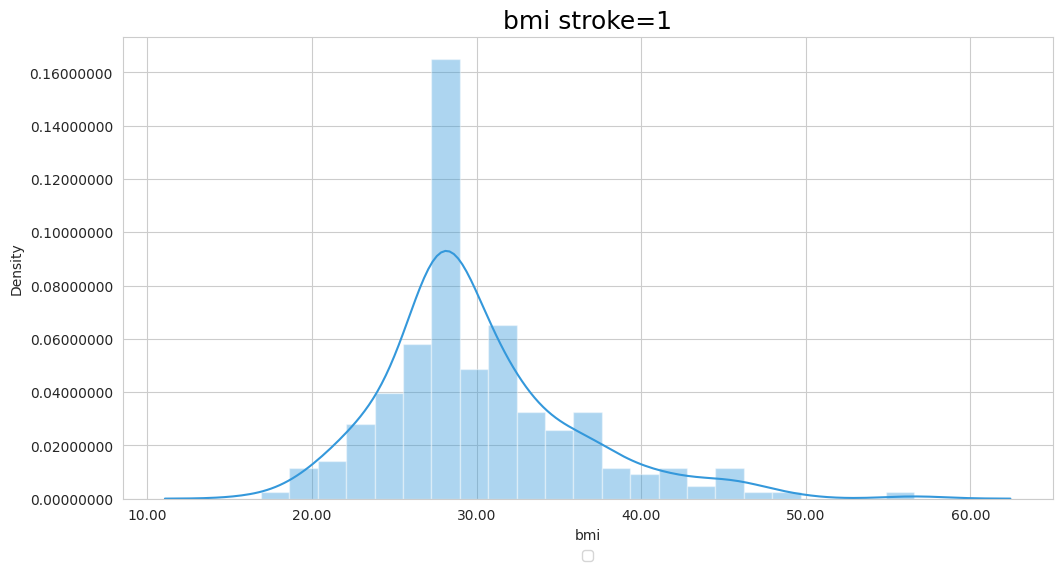

In [ ]:
plot_hist(df[df['stroke']==1], 'bmi', 'bmi', 'bmi stroke=1', True, save=False)

In [ ]:
persentil(df[df['stroke']==1], ['bmi'])

,features,Min,P1,P5,P10,P20,P25,P40,P50,P60,P75,P80,P95,P99,Max,Mean
0,bmi,16.90,19.84,22.20,23.90,26.36,27.00,28.10,28.10,29.90,32.50,34.10,41.92,46.78,56.60,30.09


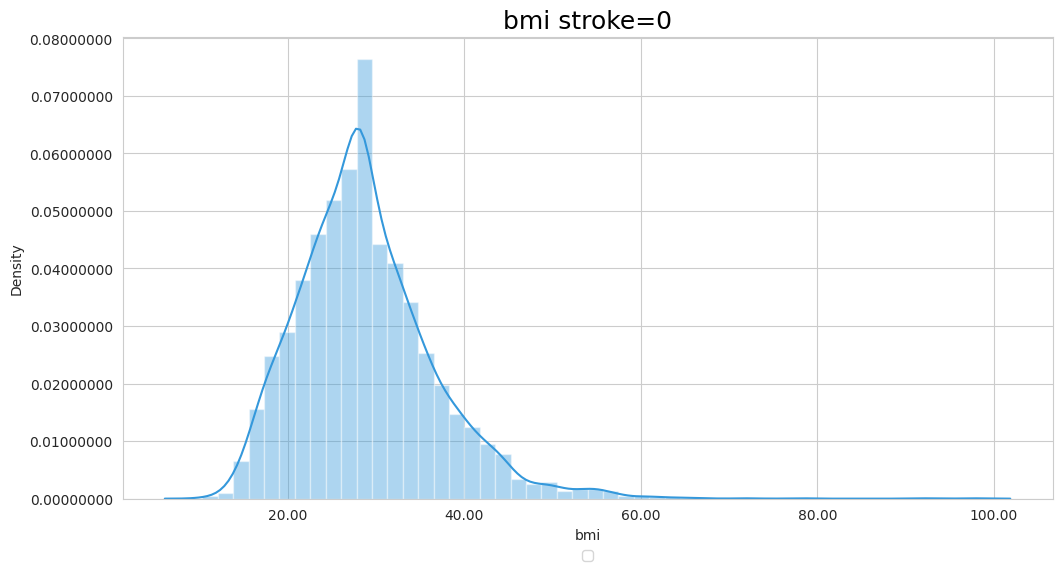

In [ ]:
plot_hist(df[df['stroke']==0], 'bmi', 'bmi', 'bmi stroke=0', True, save=False)

In [ ]:
persentil(df[df['stroke']==0], ['bmi'])

,features,Min,P1,P5,P10,P20,P25,P40,P50,P60,P75,P80,P95,P99,Max,Mean
0,bmi,10.30,15.10,17.60,19.70,22.50,23.60,26.50,28.10,29.40,32.80,34.30,42.70,53.40,97.60,28.80


In [ ]:
def convert_to_percent(x, pos):
    return f'{x*100:.0f}%'
grouped=sum_ds_cat.groupby('Product Category')
df_box = pd.DataFrame({col:vals['Ratio Returns'] for col,vals in grouped})
meds_ = df_box.median()
meds_.sort_values(ascending=False, inplace=True)
plt.figure(figsize=[10,6])
sns.boxplot(x="Ratio Returns", y="Product Category", data=sum_ds_cat,order=meds_.index,showfliers=False,palette="RdYlGn_r")
plt.title('Returns Ratio per Product Category on 2020-2023',fontsize=20)
plt.xlabel('Ratio',fontsize=18)
plt.ylabel('Category',fontsize=18)
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FuncFormatter(convert_to_percent))
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=15)
#plt.savefig('./Images/boxplot_cat.png',bbox_inches='tight',dpi=200)
plt.show()
meds_

NameError: name 'sum_ds_cat' is not defined

In [ ]:
df['stroke_2']=df['stroke'].astype('int').astype('str')

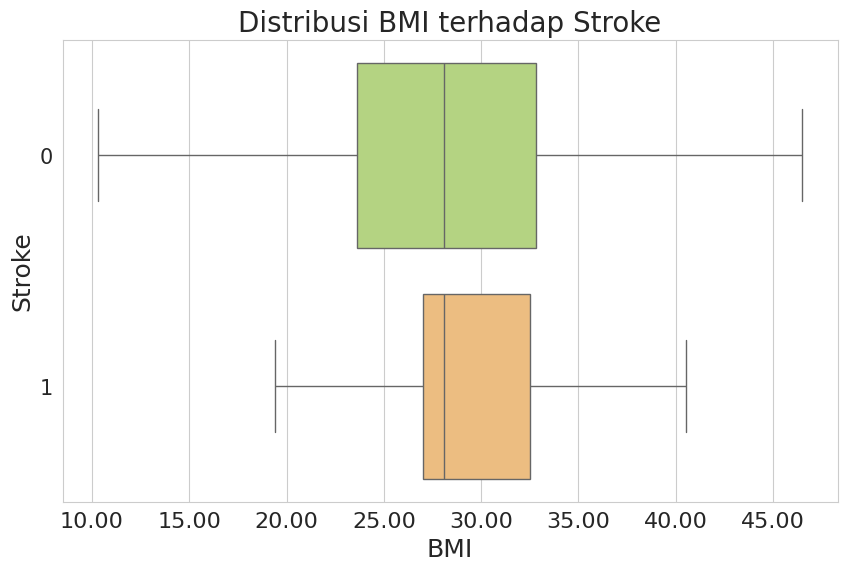

0   28.10
1   28.10
dtype: float64

In [ ]:
grouped=df.groupby('stroke_2')
df_box = pd.DataFrame({col:vals['bmi'] for col,vals in grouped})
meds_ = df_box.median()
meds_.sort_values(ascending=False, inplace=True)
plt.figure(figsize=[10,6])
sns.boxplot(x="bmi", y="stroke_2", data=df,order=meds_.index,showfliers=False,palette="RdYlGn_r")
plt.title('Distribusi BMI terhadap Stroke',fontsize=20)
plt.xlabel('BMI',fontsize=18)
plt.ylabel('Stroke',fontsize=18)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:.2f}'.format(x)))
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=15)
#plt.savefig('./Images/boxplot_cat.png',bbox_inches='tight',dpi=200)
plt.show()
meds_

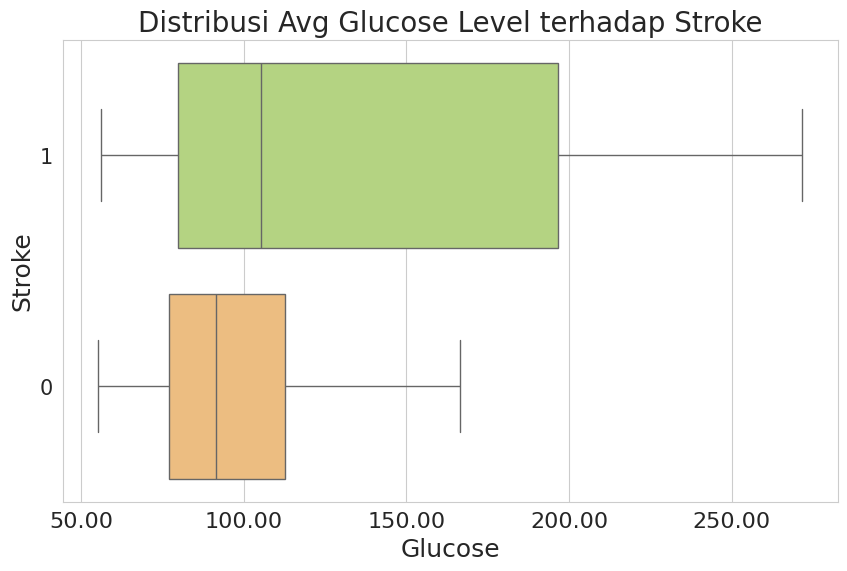

1   105.22
0    91.47
dtype: float64

In [ ]:
grouped=df.groupby('stroke_2')
df_box = pd.DataFrame({col:vals['avg_glucose_level'] for col,vals in grouped})
meds_ = df_box.median()
meds_.sort_values(ascending=False, inplace=True)
plt.figure(figsize=[10,6])
sns.boxplot(x="avg_glucose_level", y="stroke_2", data=df,order=meds_.index,showfliers=False,palette="RdYlGn_r")
plt.title('Distribusi Avg Glucose Level terhadap Stroke',fontsize=20)
plt.xlabel('Glucose',fontsize=18)
plt.ylabel('Stroke',fontsize=18)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:.2f}'.format(x)))
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=15)
#plt.savefig('./Images/boxplot_cat.png',bbox_inches='tight',dpi=200)
plt.show()
meds_

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_2
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,28.10,never smoked,1,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.00,1,0,Yes,Private,Urban,83.75,28.10,never smoked,0,0
5106,44873,Female,81.00,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0,0
5107,19723,Female,35.00,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0,0
5108,37544,Male,51.00,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0,0


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.00,5110.00,5110.00,5110.00,5110.00
mean,36517.83,43.23,0.10,0.05,106.15,28.86,0.05
std,21161.72,22.61,0.30,0.23,45.28,7.70,0.22
min,67.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.00,0.00,77.25,23.80,0.00
50%,36932.00,45.00,0.00,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.00,0.00,114.09,32.80,0.00
max,72940.00,82.00,1.00,1.00,271.74,97.60,1.00


In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
stroke_2              object
dtype: object

In [ ]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [ ]:
(249/4861)*100

5.122402797778235

In [ ]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [ ]:
df.groupby(['gender', 'stroke'], as_index=False)['id'].count()

,gender,stroke,id
0,Female,0,2853
1,Female,1,141
2,Male,0,2007
3,Male,1,108
4,Other,0,1


In [ ]:
print('% Female-stroke: ', (141/2994)*100)
print('% Male-stroke: ', (108/2115)*100)

% Female-stroke:  4.709418837675351
% Male-stroke:  5.106382978723404


In [ ]:
gender_map = {
    'Female': 0,
    'Male': 1,
    'Other':2
}
df['gender_2'] = df['gender'].map(gender_map).fillna(0).astype(int)


In [ ]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [ ]:
df.groupby(['ever_married', 'stroke'], as_index=False)['id'].count()

,ever_married,stroke,id
0,No,0,1728
1,No,1,29
2,Yes,0,3133
3,Yes,1,220


In [ ]:
print('% No Married-stroke: ', (29/1757)*100)
print('% Married-stroke: ', (220/3353)*100)

% No Married-stroke:  1.6505406943653957
% Married-stroke:  6.56128839844915


In [ ]:
married_map = {
    'No': 0,
    'Yes': 1
}
df['ever_married_2'] = df['ever_married'].map(married_map).fillna(0).astype(int)


In [ ]:
df['heart_disease'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

In [ ]:
df.groupby(['heart_disease', 'stroke'], as_index=False)['id'].count()

,heart_disease,stroke,id
0,0,0,4632
1,0,1,202
2,1,0,229
3,1,1,47


In [ ]:
print('% No HD-stroke: ', (202/4834)*100)
print('% HD-stroke: ', (47/276)*100)

% No HD-stroke:  4.178733967728589
% HD-stroke:  17.02898550724638


In [ ]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [ ]:
df.groupby(['work_type', 'stroke'], as_index=False)['id'].count()

,work_type,stroke,id
0,Govt_job,0,624
1,Govt_job,1,33
2,Never_worked,0,22
3,Private,0,2776
4,Private,1,149
5,Self-employed,0,754
6,Self-employed,1,65
7,children,0,685
8,children,1,2


In [ ]:
df[(df['work_type']=='children')&(df['stroke']==1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_2,gender_2,ever_married_2
162,69768,Female,1.32,0,0,No,children,Urban,70.37,28.10,Unknown,1,1,0,0
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.90,Unknown,1,1,0,0


In [ ]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [ ]:
df.groupby(['Residence_type', 'stroke'], as_index=False)['id'].count()

,Residence_type,stroke,id
0,Rural,0,2400
1,Rural,1,114
2,Urban,0,2461
3,Urban,1,135


In [ ]:
residential_map = {
    'Rural': 0,
    'Urban': 1
}
df['Residence_type_2'] = df['Residence_type'].map(residential_map).fillna(0).astype(int)


In [ ]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [ ]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
df.groupby(['smoking_status', 'stroke'], as_index=False)['id'].count()

,smoking_status,stroke,id
0,Unknown,0,1497
1,Unknown,1,47
2,formerly smoked,0,815
3,formerly smoked,1,70
4,never smoked,0,1802
5,never smoked,1,90
6,smokes,0,747
7,smokes,1,42


In [ ]:
print('% never smoke-stroke: ', (90/1892)*100)
print('% Unknown-stroke: ', (47/1554)*100)
print('% Formerly smoked-stroke: ', (70/885)*100)
print('% Smokes-stroke: ', (42/789)*100)


% never smoke-stroke:  4.7568710359408035
% Unknown-stroke:  3.0244530244530243
% Formerly smoked-stroke:  7.909604519774012
% Smokes-stroke:  5.323193916349809


In [ ]:
smoking_status_map = {
    'never smoked': 0,
    'Unknown': 0,
    'formerly smoked': 1,
    'smokes': 1
}
df['smoke_status_2'] = df['smoking_status'].map(smoking_status_map).fillna(0).astype(int)


In [ ]:
df['smoke_status_2'].value_counts()

smoke_status_2
0    3436
1    1674
Name: count, dtype: int64

In [ ]:
1674/(1674+3437)

0.3275288593230288

In [ ]:
(70+42)/5111

0.021913519859127373

In [ ]:
(0.02*0.0511/0.33)*100

0.30969696969696964

In [ ]:
df['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

In [ ]:
df.groupby(['hypertension', 'stroke'], as_index=False)['id'].count()

,hypertension,stroke,id
0,0,0,4429
1,0,1,183
2,1,0,432
3,1,1,66


In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_2,gender_2,ever_married_2,Residence_type_2,smoke_status_2
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1,1,1,1,1,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,28.10,never smoked,1,1,0,1,0,0
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,1,1,1,0,0
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1,1,0,1,1,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.00,1,0,Yes,Private,Urban,83.75,28.10,never smoked,0,0,0,1,1,0
5106,44873,Female,81.00,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0,0,0,1,1,0
5107,19723,Female,35.00,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0,0,0,1,0,0
5108,37544,Male,51.00,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0,0,1,1,0,1


In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'stroke_2', 'gender_2', 'ever_married_2',
       'Residence_type_2', 'smoke_status_2'],
      dtype='object')

In [ ]:
num_feat=['age', 'gender_2', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','Residence_type_2', 'smoke_status_2',
       'ever_married_2', 'stroke']
num_feat_2=['age', 'gender_2', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','Residence_type_2', 'smoke_status_2',
       'ever_married_2']

,age,gender_2,hypertension,heart_disease,avg_glucose_level,bmi,Residence_type_2,smoke_status_2,ever_married_2,stroke
age,1.00,-0.02,0.28,0.27,0.15,0.36,0.01,0.24,0.66,0.25
gender_2,-0.02,1.00,0.02,0.09,0.05,0.00,-0.01,0.04,-0.03,0.01
hypertension,0.28,0.02,1.00,0.11,0.11,0.16,-0.01,0.07,0.16,0.13
heart_disease,0.27,0.09,0.11,1.00,0.11,0.06,0.00,0.09,0.11,0.13
avg_glucose_level,0.15,0.05,0.11,0.11,1.00,0.11,-0.01,0.04,0.10,0.08
bmi,0.36,0.00,0.16,0.06,0.11,1.00,0.00,0.17,0.38,0.05
Residence_type_2,0.01,-0.01,-0.01,0.00,-0.01,0.00,1.00,0.03,0.01,0.02
smoke_status_2,0.24,0.04,0.07,0.09,0.04,0.17,0.03,1.00,0.22,0.06
ever_married_2,0.66,-0.03,0.16,0.11,0.10,0.38,0.01,0.22,1.00,0.11
stroke,0.25,0.01,0.13,0.13,0.08,0.05,0.02,0.06,0.11,1.00


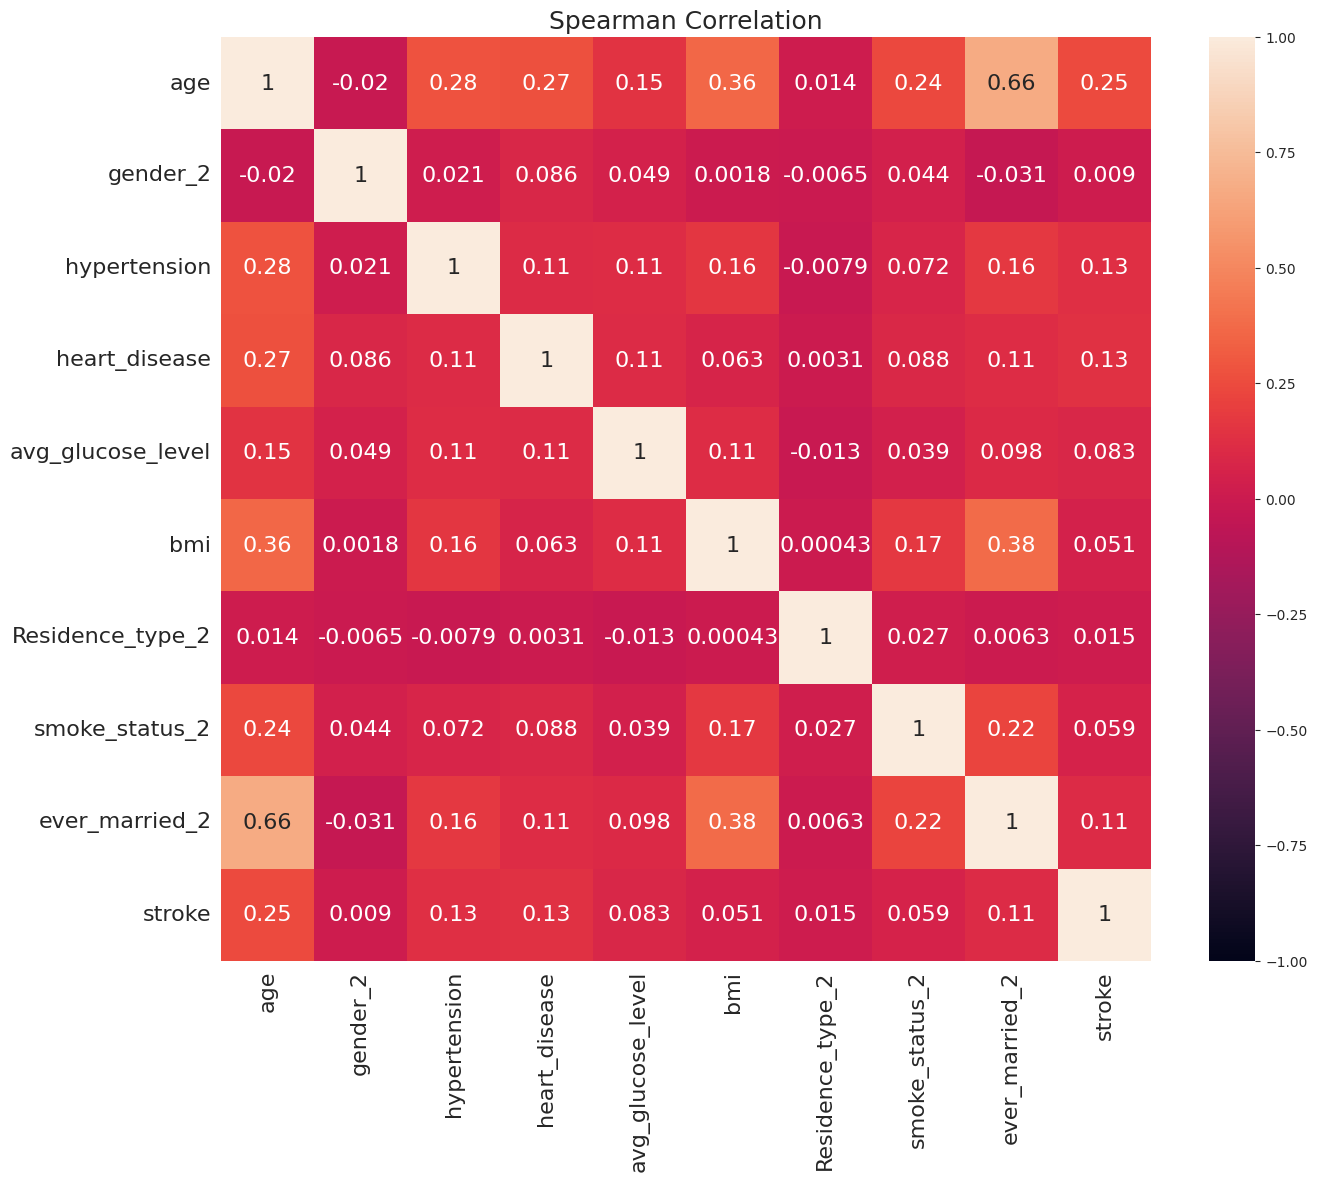

In [ ]:
display_correlation(df[num_feat], num_feat, 'Spearman Correlation Heart Stroke')

# Balancing Data

In [ ]:
df_train=df.loc[:3500].reset_index()
df_train

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_2,gender_2,ever_married_2,Residence_type_2,smoke_status_2
0,0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1,1,1,1,1,1
1,1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,28.10,never smoked,1,1,0,1,0,0
2,2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,1,1,1,0,0
3,3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1,1,0,1,1,1
4,4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,3496,37395,Female,16.00,0,0,No,Private,Urban,63.63,20.00,smokes,0,0,0,0,1,1
3497,3497,8240,Female,37.00,0,0,Yes,Private,Urban,100.22,22.70,smokes,0,0,0,1,1,1
3498,3498,9620,Female,43.00,0,0,Yes,Govt_job,Rural,81.77,25.40,never smoked,0,0,0,1,0,0
3499,3499,7092,Female,27.00,0,0,Yes,Private,Rural,94.25,37.60,never smoked,0,0,0,1,0,0


In [ ]:
df_test=df.loc[3501:].reset_index()
df_test

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_2,gender_2,ever_married_2,Residence_type_2,smoke_status_2
0,3501,59506,Male,14.00,0,0,No,Private,Rural,164.70,26.30,Unknown,0,0,1,0,0,0
1,3502,43397,Male,81.00,0,1,Yes,Self-employed,Rural,68.27,25.00,Unknown,0,0,1,1,0,0
2,3503,62384,Male,52.00,0,1,No,Self-employed,Rural,79.81,28.10,formerly smoked,0,0,1,0,0,1
3,3504,10651,Male,54.00,1,0,Yes,Govt_job,Rural,100.12,32.30,formerly smoked,0,0,1,1,0,1
4,3505,69750,Female,77.00,0,0,Yes,Self-employed,Urban,151.23,24.90,never smoked,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,5105,18234,Female,80.00,1,0,Yes,Private,Urban,83.75,28.10,never smoked,0,0,0,1,1,0
1605,5106,44873,Female,81.00,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0,0,0,1,1,0
1606,5107,19723,Female,35.00,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0,0,0,1,0,0
1607,5108,37544,Male,51.00,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0,0,1,1,0,1


In [ ]:
df_train.stroke.value_counts()

stroke
0    3252
1     249
Name: count, dtype: int64

In [ ]:
df_test.stroke.value_counts()

stroke
0    1609
Name: count, dtype: int64

In [ ]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [ ]:
5100*0.7

3570.0

In [ ]:
from imblearn.over_sampling import SMOTE

# Assuming you have features X and target variable y
X = df[num_feat_2]  # Drop the target column if it's already in the DataFrame
y = df['stroke']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_resampled.shape

(9722, 9)

In [ ]:
y_resampled.value_counts()

stroke
1    4861
0    4861
Name: count, dtype: int64

# Modelling XGBoost


Model ini dibangun dengan data yang imbalance



In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a DataFrame with 'product_name' and 'flag' columns
# df should be your dataset with text data and labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[num_feat_2], df['stroke'], test_size=0.3, random_state=42)

# Create an XGBoost classifier
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display a classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

Accuracy: 0.9295499021526419
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1444
           1       0.15      0.04      0.07        89

    accuracy                           0.93      1533
   macro avg       0.55      0.51      0.52      1533
weighted avg       0.90      0.93      0.91      1533



In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

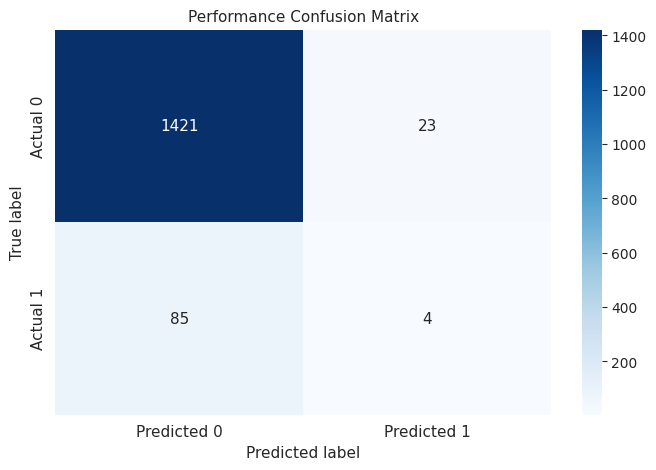

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], annot_kws={
                'fontsize': 11})
plt.xlabel('Predicted label', fontsize=11)
plt.ylabel('True label', fontsize=11)
plt.title('Confusion Matrix')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title("Performance Confusion Matrix", fontsize=11)
#plt.savefig('./Images/confusion_matrix.png')
plt.show()

In [ ]:
conf_matrix

array([[1421,   23],
       [  85,    4]])

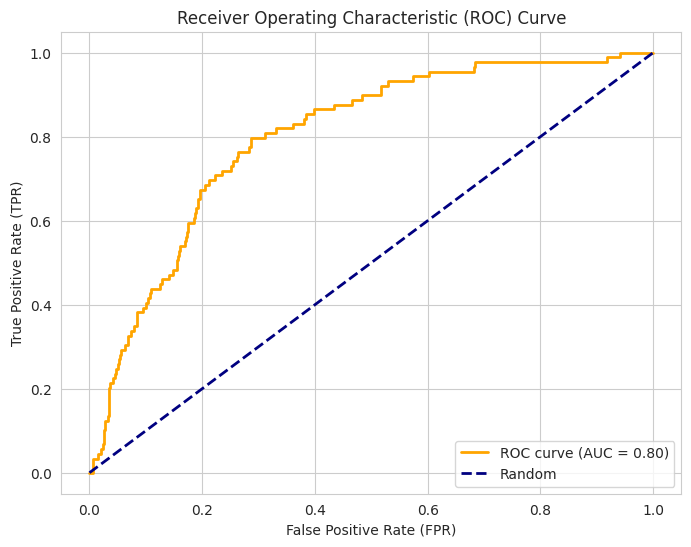

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate the FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve with AUC value
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
#plt.savefig('./Images/ROC_xgboost.png')
plt.show()

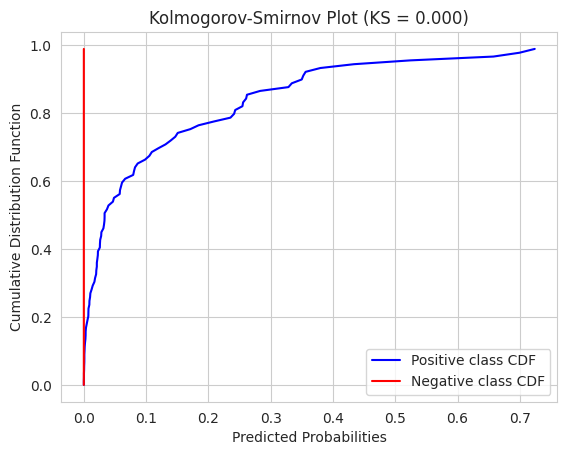

In [ ]:
# Convert to numpy arrays
y_true = np.array(y_test)
y_pred_prob = np.array(y_pred_prob)

# Sort the predicted probabilities according to true labels
y_pos = y_pred_prob[y_true == 1]
y_neg = y_pred_prob[y_true == 0]

# Sort the arrays
y_pos = np.sort(y_pos)
y_neg = np.sort(y_neg)

# Match sizes if they're different
min_size = min(len(y_pos), len(y_neg))
y_pos = y_pos[:min_size]
y_neg = y_neg[:min_size]

# Calculate cumulative distributions
cdf_pos = np.arange(min_size) / min_size
cdf_neg = np.arange(min_size) / min_size

# Calculate the KS statistic
ks_statistic = np.max(np.abs(cdf_pos - cdf_neg))

# Plot the KS plot
plt.plot(y_pos, cdf_pos, color='blue', label='Positive class CDF')
plt.plot(y_neg, cdf_neg, color='red', label='Negative class CDF')
plt.title(f"Kolmogorov-Smirnov Plot (KS = {ks_statistic:.3f})")
plt.xlabel('Predicted Probabilities')
plt.ylabel('Cumulative Distribution Function')
plt.legend()
plt.show()


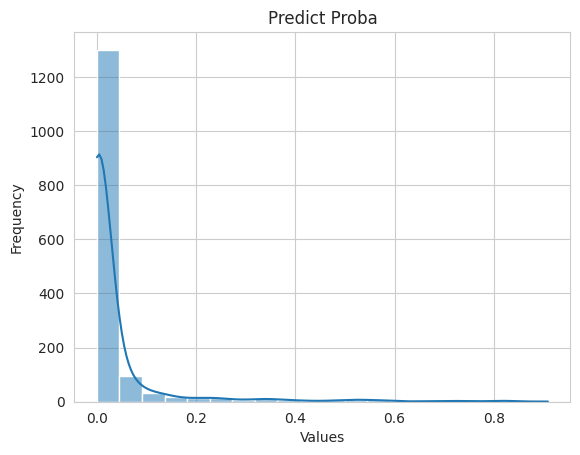

In [ ]:
sns.histplot(y_pred_prob, bins=20, kde=True)  # Adjust 'bins' for the number of bins in the histogram

# Set plot labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Predict Proba')

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score

# Define the scoring functions for cross-validation
scoring = {
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1_score': make_scorer(f1_score),
    'accuracy': make_scorer(accuracy_score),
    'auc': make_scorer(roc_auc_score)
}

# Perform k-fold cross-validation (k=10)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
results = cross_validate(model, df[num_feat_2], df['stroke'], cv=kfold, scoring=scoring)

# Create a DataFrame to store the cross-validation results
cv_results = pd.DataFrame({
    'Recall': results['test_recall'],
    'Precision': results['test_precision'],
    'F1-Score': results['test_f1_score'],
    'Accuracy': results['test_accuracy'],
    'AUC': results['test_auc']
})

# Display the cross-validation results
cv_results

,Recall,Precision,F1-Score,Accuracy,AUC
0,0.00,0.00,0.00,0.94,0.50
1,0.09,0.23,0.13,0.92,0.53
2,0.07,0.17,0.10,0.93,0.53
3,0.12,0.30,0.17,0.94,0.55
4,0.07,0.12,0.09,0.96,0.53
5,0.04,0.10,0.06,0.94,0.51
6,0.05,0.14,0.07,0.95,0.52
7,0.09,0.50,0.15,0.94,0.54
8,0.05,0.11,0.07,0.95,0.52
9,0.04,0.14,0.07,0.95,0.52


# Modelling XGBoost (2)

Model ini dibangun dengan data yang sudah balance menggunakan SMOTE

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a DataFrame with 'product_name' and 'flag' columns
# df should be your dataset with text data and labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Create an XGBoost classifier
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display a classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

Accuracy: 0.932807679122386
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1457
           1       0.92      0.95      0.93      1460

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

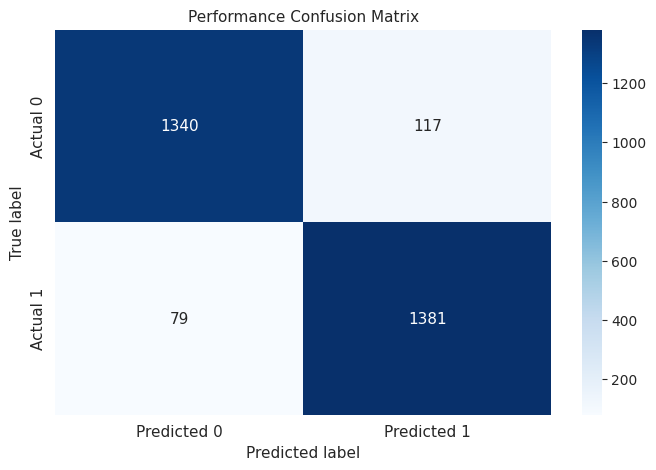

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], annot_kws={
                'fontsize': 11})
plt.xlabel('Predicted label', fontsize=11)
plt.ylabel('True label', fontsize=11)
plt.title('Confusion Matrix')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title("Performance Confusion Matrix", fontsize=11)
#plt.savefig('./Images/confusion_matrix.png')
plt.show()

In [ ]:
print('Recall: ',  conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[1,0]))
print('Precision: ',  (conf_matrix[1,1]+conf_matrix[0,0])/(conf_matrix[1,1]+conf_matrix[0,0]+conf_matrix[0,1]+conf_matrix[1,0]))

Recall:  0.9458904109589041
Precision:  0.932807679122386


- Recall: rate False Negative terhadap True Positive
- Precision: rate False Positive terhadap True Positive

> Makin kecil False Negative, makin besar Recall. Vice versa.

> Makin kecil False Positive, makin besar Precision. Vice versa.


Business performance:
- Succeed Early Warning Rate = Recall  (Rate pasien yang berhasil diperingatkan potensi stroke secara tepat)
- Error Warning Rate = 1- Precision:  (Rate pasien yang salah diprediksi akan terkena stroke)

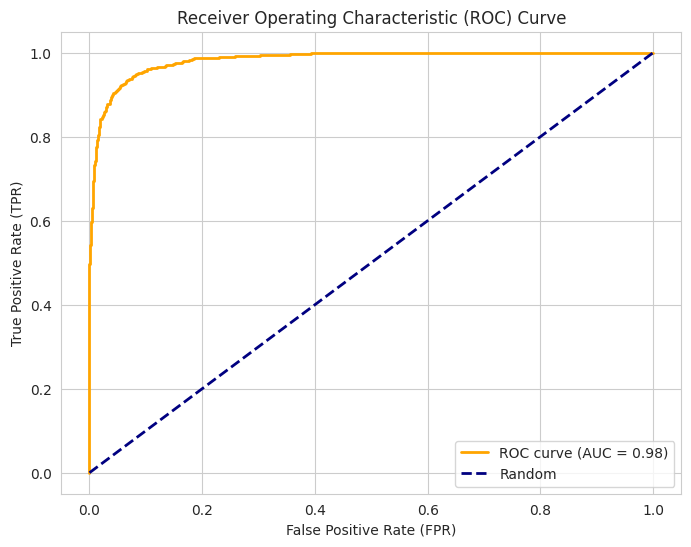

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate the FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve with AUC value
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
#plt.savefig('./Images/ROC_xgboost.png')
plt.show()

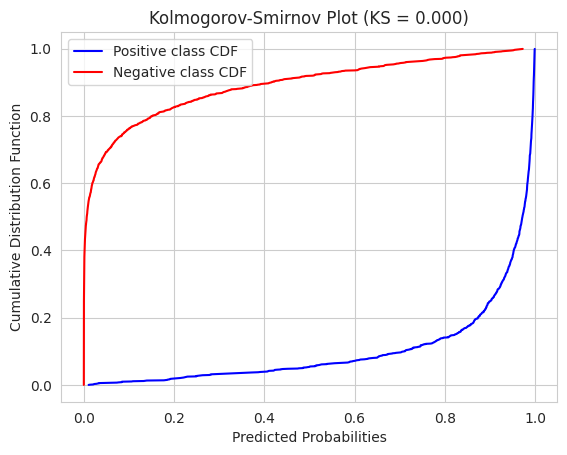

In [ ]:
# Convert to numpy arrays
y_true = np.array(y_test)
y_pred_prob = np.array(y_pred_prob)

# Sort the predicted probabilities according to true labels
y_pos = y_pred_prob[y_true == 1]
y_neg = y_pred_prob[y_true == 0]

# Sort the arrays
y_pos = np.sort(y_pos)
y_neg = np.sort(y_neg)

# Match sizes if they're different
min_size = min(len(y_pos), len(y_neg))
y_pos = y_pos[:min_size]
y_neg = y_neg[:min_size]

# Calculate cumulative distributions
cdf_pos = np.arange(min_size) / min_size
cdf_neg = np.arange(min_size) / min_size

# Calculate the KS statistic
ks_statistic = np.max(np.abs(cdf_pos - cdf_neg))

# Plot the KS plot
plt.plot(y_pos, cdf_pos, color='blue', label='Positive class CDF')
plt.plot(y_neg, cdf_neg, color='red', label='Negative class CDF')
plt.title(f"Kolmogorov-Smirnov Plot (KS = {ks_statistic:.3f})")
plt.xlabel('Predicted Probabilities')
plt.ylabel('Cumulative Distribution Function')
plt.legend()
plt.show()


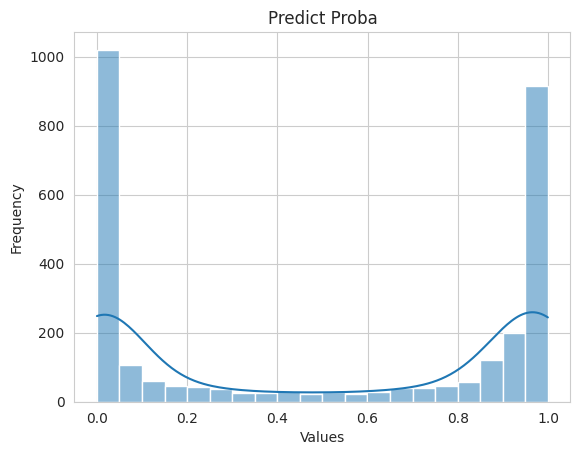

In [ ]:
sns.histplot(y_pred_prob, bins=20, kde=True)  # Adjust 'bins' for the number of bins in the histogram

# Set plot labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Predict Proba')

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score

# Define the scoring functions for cross-validation
scoring = {
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1_score': make_scorer(f1_score),
    'accuracy': make_scorer(accuracy_score),
    'auc': make_scorer(roc_auc_score)
}

# Perform k-fold cross-validation (k=10)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
results = cross_validate(model, X_resampled, y_resampled, cv=kfold, scoring=scoring)

# Create a DataFrame to store the cross-validation results
cv_results = pd.DataFrame({
    'Recall': results['test_recall'],
    'Precision': results['test_precision'],
    'F1-Score': results['test_f1_score'],
    'Accuracy': results['test_accuracy'],
    'AUC': results['test_auc']
})

# Display the cross-validation results
cv_results

,Recall,Precision,F1-Score,Accuracy,AUC
0,0.97,0.92,0.94,0.94,0.94
1,0.96,0.93,0.95,0.95,0.95
2,0.95,0.92,0.94,0.94,0.94
3,0.96,0.90,0.93,0.93,0.93
4,0.97,0.93,0.95,0.95,0.95
5,0.96,0.92,0.94,0.94,0.94
6,0.94,0.92,0.93,0.93,0.93
7,0.95,0.94,0.95,0.94,0.94
8,0.96,0.92,0.94,0.94,0.94
9,0.96,0.94,0.95,0.94,0.94


# Modelling ANN

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score

from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor   #ini masih error, belum bisa diimport

In [ ]:
# Scaling data
from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit_transform(X_resampled)
std

array([[ 0.53173602,  1.43699125, -0.3030987 , ...,  1.20728326,
         1.62853961,  0.61738327],
       [ 0.26092151, -0.6952476 , -0.3030987 , ..., -0.82830603,
        -0.61404709,  0.61738327],
       [ 1.11850081,  1.43699125, -0.3030987 , ..., -0.82830603,
        -0.61404709,  0.61738327],
       ...,
       [ 1.11850081,  1.43699125, -0.3030987 , ..., -0.82830603,
         1.62853961,  0.61738327],
       [ 0.89073414, -0.6952476 , -0.3030987 , ..., -0.82830603,
        -0.61404709,  0.61738327],
       [ 0.26092151, -0.6952476 , -0.3030987 , ..., -0.82830603,
        -0.61404709,  0.61738327]])

In [ ]:
# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
y_resampled_ = le.fit_transform(y_resampled)

# Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(std, y_resampled_, test_size=0.2, random_state=42)

## Model Percobaan Awal

In [ ]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/20
244/244 [==============================] - 4s 7ms/step - loss: 0.4524 - accuracy: 0.7945 - val_loss: 0.4097 - val_accuracy: 0.8129
Epoch 2/20
244/244 [==============================] - 1s 5ms/step - loss: 0.3934 - accuracy: 0.8208 - val_loss: 0.3971 - val_accuracy: 0.8211
Epoch 3/20
244/244 [==============================] - 2s 8ms/step - loss: 0.3776 - accuracy: 0.8318 - val_loss: 0.3871 - val_accuracy: 0.8226
Epoch 4/20
244/244 [==============================] - 2s 7ms/step - loss: 0.3691 - accuracy: 0.8346 - val_loss: 0.3814 - val_accuracy: 0.8278
Epoch 5/20
244/244 [==============================] - 2s 7ms/step - loss: 0.3628 - accuracy: 0.8366 - val_loss: 0.3751 - val_accuracy: 0.8319
Epoch 6/20
244/244 [==============================] - 1s 3ms/step - loss: 0.3570 - accuracy: 0.8448 - val_loss: 0.3706 - val_accuracy: 0.8375
Epoch 7/20
244/244 [==============================] - 1s 2ms/step - loss: 0.3530 - accuracy: 0.8429 - val_loss: 0.3724 - val_accuracy: 0.8334
Epoch 

In [ ]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=SGD(learning_rate = 0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
195/195 [==============================] - 1s 3ms/step - loss: 0.8540 - accuracy: 0.6930 - val_loss: 0.5333 - val_accuracy: 0.7211
Epoch 2/10
195/195 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7362 - val_loss: 0.5160 - val_accuracy: 0.7320
Epoch 3/10
195/195 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.7357 - val_loss: 0.5050 - val_accuracy: 0.7494
Epoch 4/10
195/195 [==============================] - 0s 2ms/step - loss: 0.5121 - accuracy: 0.7314 - val_loss: 0.4923 - val_accuracy: 0.7545
Epoch 5/10
195/195 [==============================] - 0s 2ms/step - loss: 0.5048 - accuracy: 0.7451 - val_loss: 0.5476 - val_accuracy: 0.7307
Epoch 6/10
195/195 [==============================] - 1s 3ms/step - loss: 0.5056 - accuracy: 0.7451 - val_loss: 0.5156 - val_accuracy: 0.7423
Epoch 7/10
195/195 [==============================] - 1s 3ms/step - loss: 0.5047 - accuracy: 0.7457 - val_loss: 0.4795 - val_accuracy: 0.7564
Epoch 

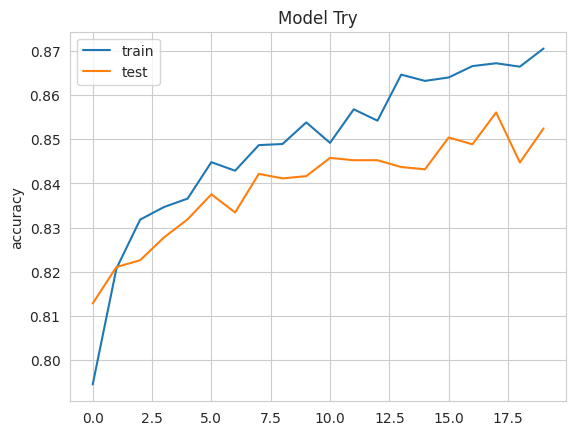

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Try')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)

61/61 [==============================] - 1s 3ms/step
Precision: 0.833822091886608
Recall: 0.8793814432989691


Model ini sudah cukup baik karena Recall ~88%

## Manual Tuning

### Epochs

In [ ]:
# fit a model and plot learning curve
def model_epoch(X_train, y_train, X_test, y_test, epochs):
    # define model
    model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')])

    # compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0)

    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('epoch='+str(epochs))
    plt.ylabel('Accuracy')
    plt.legend()

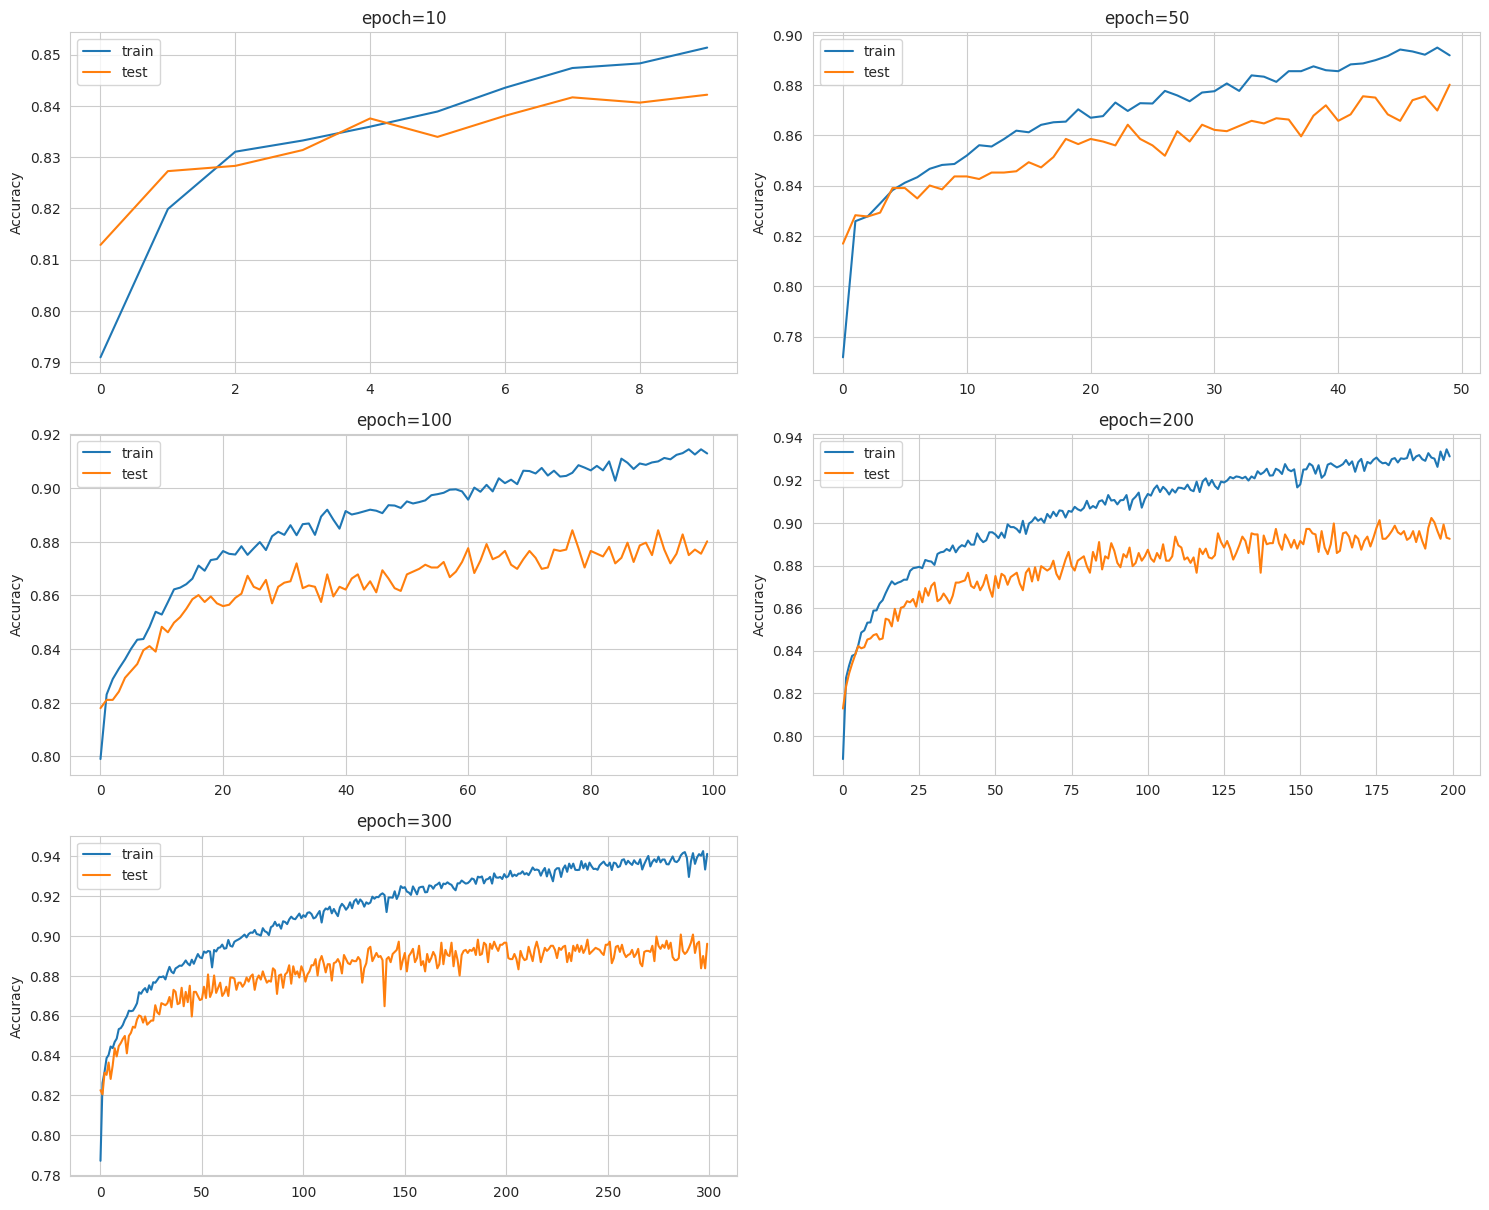

In [ ]:
epoch = [10, 50, 100, 200, 300]

plt.figure(figsize = (15, 20))
for i in range(len(epoch)):
    plt.subplot(5, 2, i + 1)

    model_epoch(X_train, y_train, X_test, y_test, epoch[i])

plt.tight_layout()
plt.show()
#plt.savefig('fig/epoch.png', bbox_inches = 'tight', dpi = 300, transparent = True)

In [ ]:
plt.show()

In [ ]:
# while True:
#     time.sleep(60)

### Batch Size

In [ ]:
# fit a model and plot learning curve
def model_batchs(X_train, y_train, X_test, y_test, batchs):
    # define model
    model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')])

    # compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_train, y_train), epochs=300, batch_size=batchs, verbose=0)

    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch_size='+str(batchs))
    plt.ylabel('Accuracy')
    plt.legend()

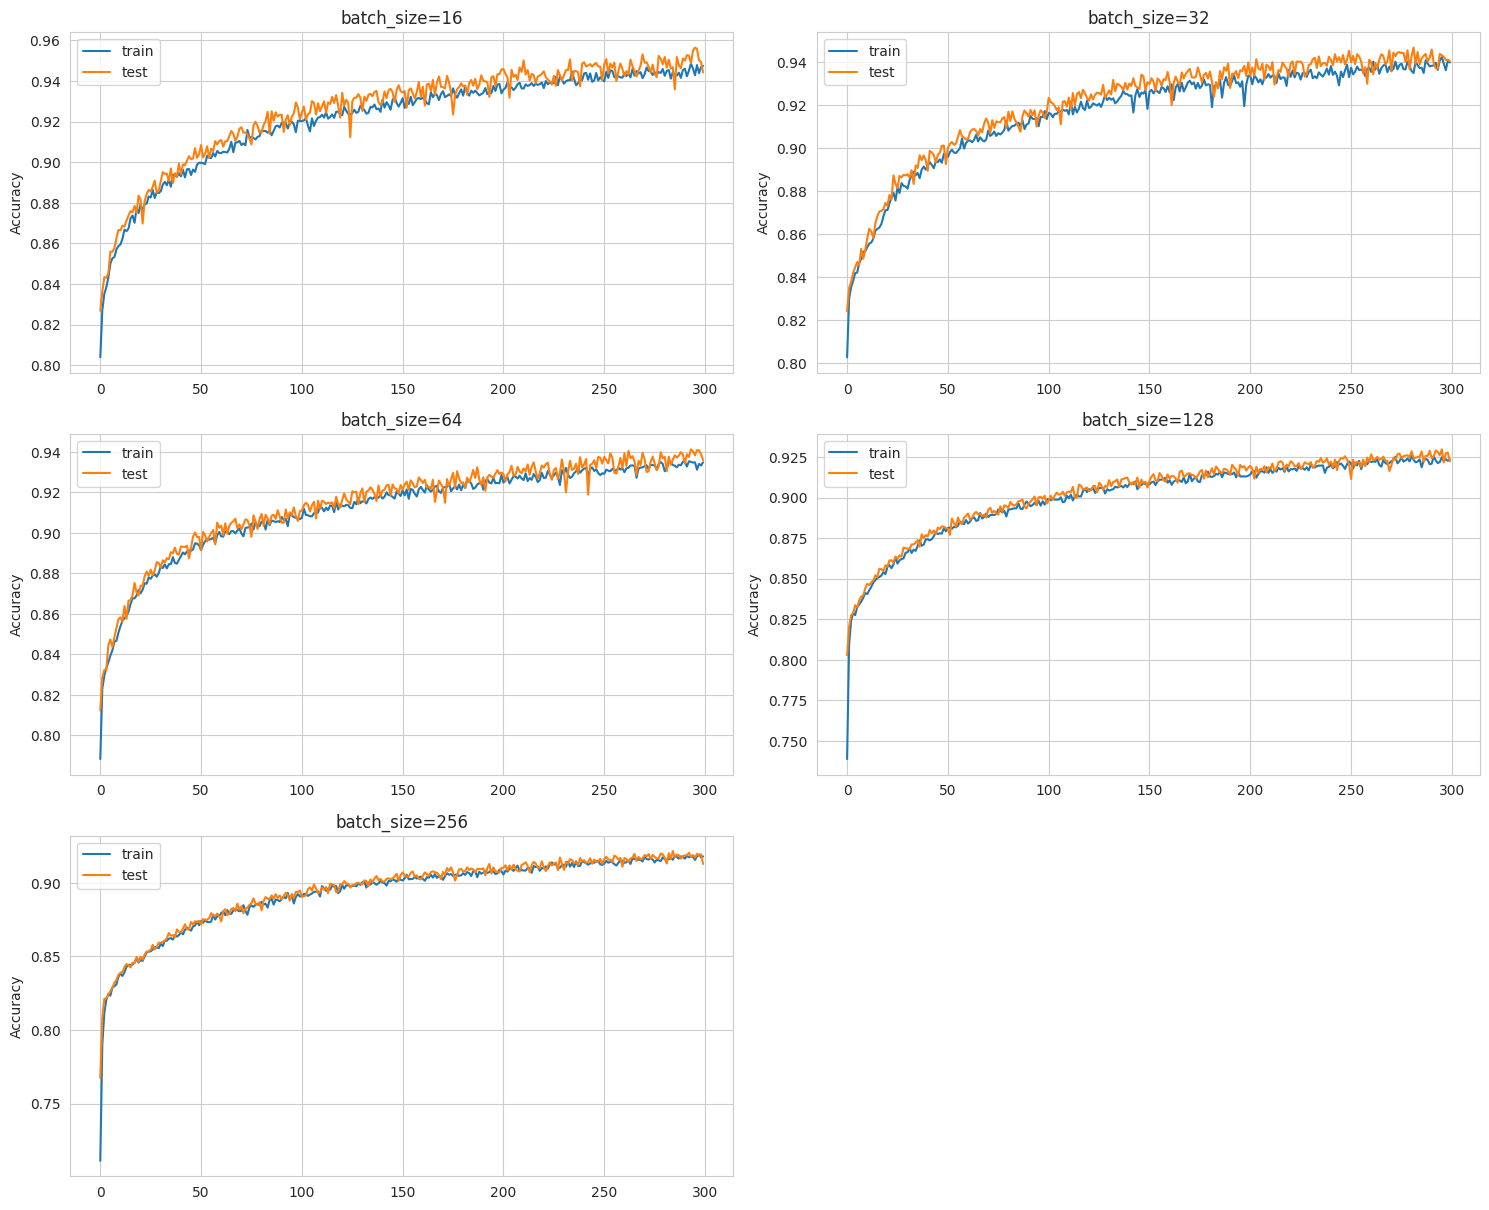

In [ ]:
batch_size = [16, 32, 64, 128, 256]

plt.figure(figsize = (15, 20))
for i in range(len(batch_size)):
    plt.subplot(5, 2, i + 1)

    model_batchs(X_train, y_train, X_test, y_test, batch_size[i])

plt.tight_layout()
plt.show()
#plt.savefig('fig/batch size.png', bbox_inches = 'tight', dpi = 300, transparent = True)

## Activational Functions

In [ ]:
# fit a model and plot learning curve
def model_activation_hid(X_train, y_train, X_test, y_test, actfunc):
    # define model
    model = Sequential([
    Dense(64, activation=actfunc, input_shape=(X_train.shape[1],)),
    Dense(32, activation=actfunc),
    Dense(1, activation=actfunc)])

    # compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_train, y_train), epochs=300, batch_size=16, verbose=0)

    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('Activational Function: '+str(actfunc))
    plt.ylabel('Accuracy')
    plt.legend()

In [ ]:
#activationf_hidden=['relu', tf.keras.layers.LeakyReLU(alpha=0.01), 'sigmoid', 'softmax', 'tanh']
activationf_hidden=['relu', 'sigmoid', 'softmax', 'tanh']

#activationf_hidden_=['relu', 'leaky-relu', 'sigmoid', 'softmax', 'tanh']

plt.figure(figsize = (15, 20))
for i in range(len(activationf_hidden)):
    plt.subplot(5, 2, i + 1)

    model_activation_hid(X_train, y_train, X_test, y_test, actfunc=activationf_hidden[i])

plt.tight_layout()
plt.show()
#plt.savefig('fig/activation function - hidden layer.png', bbox_inches = 'tight', dpi = 300, transparent = True)

## GRID Search Tuning

In [ ]:
def build_regressor(optimizer):
    model = Sequential()
    model.add(Dropout(0.2, input_shape = (27,))) # input and drop out layer
    model.add(Dense(27, activation = 'relu', kernel_initializer = 'uniform')) # 1st hidden layer
    model.add(Dense(14, activation = 'relu', kernel_initializer = 'uniform')) # 2nd hidden layer
    model.add(Dense(7, activation = 'relu', kernel_initializer = 'uniform')) # 3nd hidden layer
    model.add(Dense(1, activation = 'relu', kernel_initializer = 'uniform')) # output layer

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
regressor = KerasRegressor(build_fn = build_regressor)

parameters = {
    'epochs' : [350],
    'batch_size' : [1, 4, 8, 16, 32, 64, 128, 256, 512],
    'optimizer' : ['adam', 'rmsprop']
}

grid_search = GridSearchCV(estimator = regressor, param_grid = parameters, scoring = 'accuracy', cv = 10)

grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

NameError: name 'KerasRegressor' is not defined